UMKC CS5565
Intro to Statistical Learning Final Project FS 2024

In [4]:
!pip install ISLP

In [5]:
!pip install seaborn

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from matplotlib.pyplot import subplots
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)


In [7]:
url = 'https://raw.githubusercontent.com/ShewlyMisty/Final-Project-COMP_SCI-5565/refs/heads/main/bank.csv'
Bank = pd.read_csv(url)
print(Bank.columns)


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')


In [8]:
Bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


Section A:

Part 1: Regression
Complete the following objectives utilizing the data set you selected as ideal for:
Linear Regression
Note: you may use the exercise from Chapter 3 as a reference link here --> Chapter 3 (Linear Regression).

1) Pick a set of feature value(s) you prefer. Be consistent such that you keep the previous features when adding more for the higher dimensional models.

Each model should be fit to the same response.

a) Linear Regression

b) Polynomial Regression

c) Multi-Linear Regression


In [9]:
RANDOM_SEED = 7677

In [10]:
numerical_columns = Bank.select_dtypes(include=['int64']).columns
print(numerical_columns)

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')


In [11]:
correlation_matrix = Bank[numerical_columns].corr()
print(correlation_matrix)

               age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.112300 -0.000762  0.000189 -0.005278  0.002774  0.020169
balance   0.112300  1.000000  0.010467  0.022436 -0.013894  0.017411  0.030805
day      -0.000762  0.010467  1.000000 -0.018511  0.137007 -0.077232 -0.058981
duration  0.000189  0.022436 -0.018511  1.000000 -0.041557 -0.027392 -0.026716
campaign -0.005278 -0.013894  0.137007 -0.041557  1.000000 -0.102726 -0.049699
pdays     0.002774  0.017411 -0.077232 -0.027392 -0.102726  1.000000  0.507272
previous  0.020169  0.030805 -0.058981 -0.026716 -0.049699  0.507272  1.000000


In [12]:
correlation_pairs = correlation_matrix.unstack().sort_values(ascending=False)
# Remove self-correlations and duplicates
correlation_pairs = correlation_pairs[correlation_pairs != 1.0].drop_duplicates()
print(correlation_pairs.head(10))

previous  pdays       0.507272
day       campaign    0.137007
balance   age         0.112300
previous  balance     0.030805
balance   duration    0.022436
previous  age         0.020169
balance   pdays       0.017411
          day         0.010467
pdays     age         0.002774
age       duration    0.000189
dtype: float64


In [13]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset
# Assuming `Bank` is your dataset, and 'day' is the response variable

# Define the response variable
y = Bank['day']

# Define the base predictor variable for consistent feature addition
X_base = Bank[['balance']]  # Starting with 'balance' as the base predictor

# Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X_base, y, test_size=0.3, random_state=42)

# ---- (a) Linear Regression ----
print("\n(a) Linear Regression:")
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_lin = lin_model.predict(X_test)
mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)
print(f"Mean Squared Error: {mse_lin}")
print(f"R² Score: {r2_lin}")

# ---- (b) Polynomial Regression ----
print("\n(b) Polynomial Regression:")
poly = PolynomialFeatures(degree=2)  # Adding polynomial features
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Predict and evaluate
y_pred_poly = poly_model.predict(X_test_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)
print(f"Mean Squared Error: {mse_poly}")
print(f"R² Score: {r2_poly}")

# ---- (c) Multi-Linear Regression ----
print("\n(c) Multi-Linear Regression:")
# Adding more predictors for multi-linear regression
X_multi = Bank[['balance', 'age', 'duration']]  # Incrementally add more features
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y, test_size=0.3, random_state=42)

multi_model = LinearRegression()
multi_model.fit(X_train_multi, y_train_multi)

# Predict and evaluate
y_pred_multi = multi_model.predict(X_test_multi)
mse_multi = mean_squared_error(y_test_multi, y_pred_multi)
r2_multi = r2_score(y_test_multi, y_pred_multi)
print(f"Mean Squared Error: {mse_multi}")
print(f"R² Score: {r2_multi}")



(a) Linear Regression:
Mean Squared Error: 70.98372306849664
R² Score: -0.0008501138444640954

(b) Polynomial Regression:
Mean Squared Error: 71.014480800016
R² Score: -0.001283789027478166

(c) Multi-Linear Regression:
Mean Squared Error: 70.93935566077079
R² Score: -0.00022454613465883178


(a) Linear Regression

In [14]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Define the response variable and the base predictor
y = Bank['previous']
X_base = Bank[['pdays']]  # Using 'balance' as the base predictor

# Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X_base, y, test_size=0.3, random_state=42)

# Fit the Linear Regression model
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_lin = lin_model.predict(X_test)
mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)

# Print results
print("\n(a) Linear Regression:")
print(f"Mean Squared Error: {mse_lin}")
print(f"R² Score: {r2_lin}")



(a) Linear Regression:
Mean Squared Error: 5.201665085922132
R² Score: 0.24241626005864214


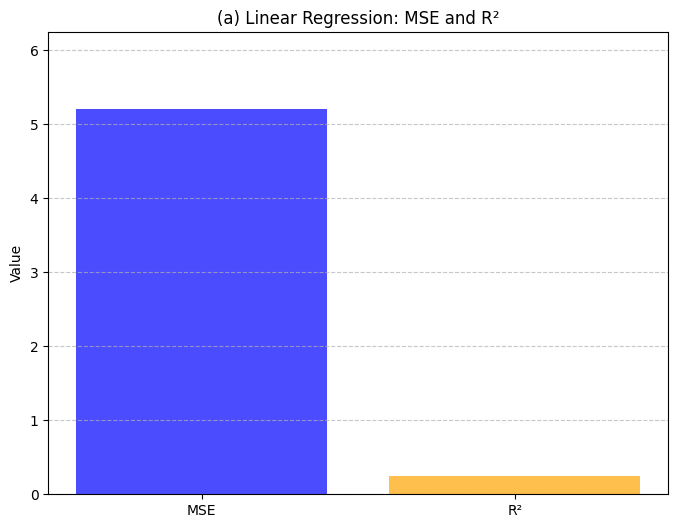

In [15]:
import matplotlib.pyplot as plt

# Compute MSE and R²
mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)

# Plot MSE and R²
plt.figure(figsize=(8, 6))
plt.bar(['MSE', 'R²'], [mse_lin, r2_lin], color=['blue', 'orange'], alpha=0.7)
plt.title('(a) Linear Regression: MSE and R²')
plt.ylabel('Value')
plt.ylim([0, max(mse_lin, r2_lin) * 1.2])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Shape of X_test: (3349, 1)
Shape of y_test: (3349,)


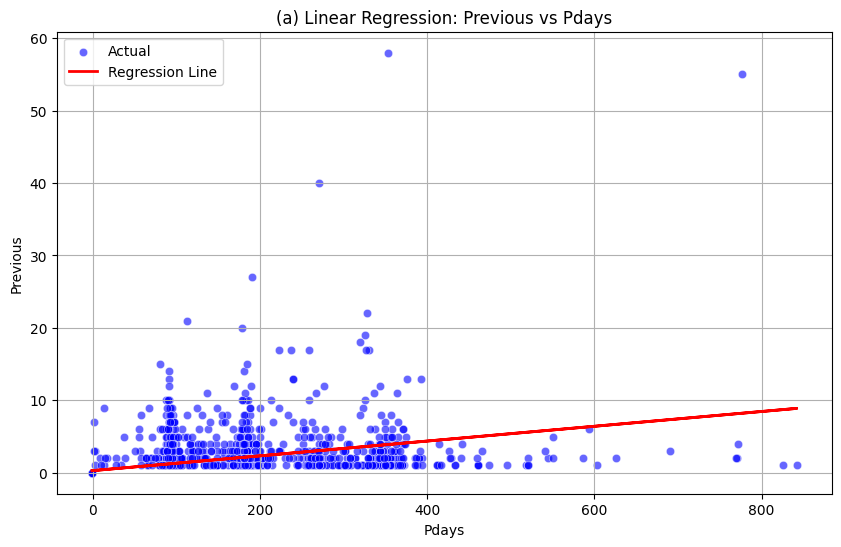

In [16]:
# Debugging the shapes
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

# If using 1D test data
plt.figure(figsize=(10, 6))

# Scatter plot of actual values
# Changed line to access the 'pdays' column directly
sns.scatterplot(x=X_test['pdays'], y=y_test, color='blue', label='Actual', alpha=0.6)

# Plot the regression line
# Changed line to access the 'pdays' column directly
plt.plot(X_test['pdays'], y_pred_lin, color='red', label='Regression Line', linewidth=2)

# Add labels and title
plt.xlabel('Pdays')
plt.ylabel('Previous')
plt.title('(a) Linear Regression: Previous vs Pdays')
plt.legend()
plt.grid()
plt.show()

Residuals for Linear Regression

/usr/local/lib/python3.10/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


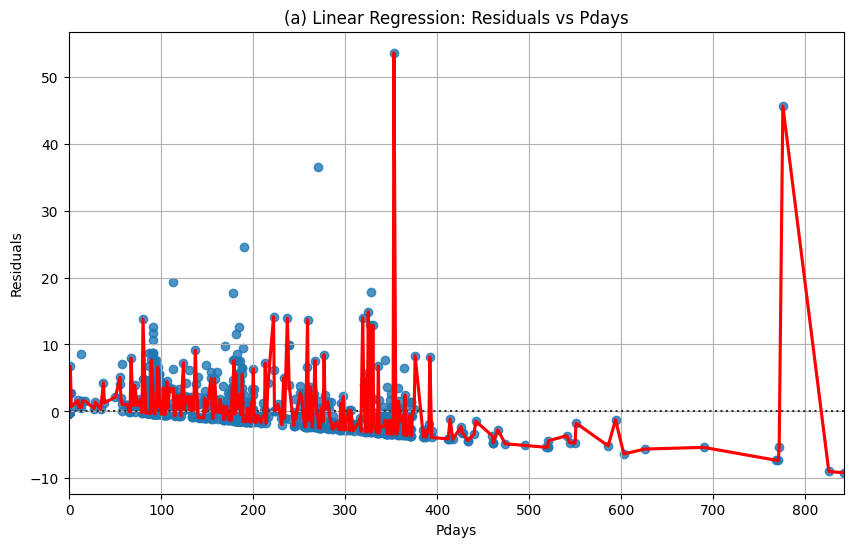

In [17]:
# Ensure X_test and residuals_lin have matching dimensions
# Calculate residuals:
residuals_lin = y_test - y_pred_lin

X_test_flat = X_test.values.flatten()[:len(residuals_lin)]  # Align lengths, convert to NumPy array first

# Plot Residuals
plt.figure(figsize=(10, 6))
sns.residplot(x=X_test_flat, y=residuals_lin, lowess=True, line_kws={"color": "red"})

# Add labels and title
plt.xlabel('Pdays')
plt.ylabel('Residuals')
plt.title('(a) Linear Regression: Residuals vs Pdays')
plt.grid()
plt.show()

(b) Polynomial Regression

In [18]:
from sklearn.preprocessing import PolynomialFeatures

# Define the response variable and the base predictor
y = Bank['previous']
X_base = Bank[['pdays']]  # Using 'balance' as the base predictor

# Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X_base, y, test_size=0.3, random_state=42)

# Transform the data to include polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit the Polynomial Regression model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Predict and evaluate
y_pred_poly = poly_model.predict(X_test_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

# Print results
print("\n(b) Polynomial Regression:")
print(f"Mean Squared Error: {mse_poly}")
print(f"R² Score: {r2_poly}")



(b) Polynomial Regression:
Mean Squared Error: 5.020524035487627
R² Score: 0.26879810359879597


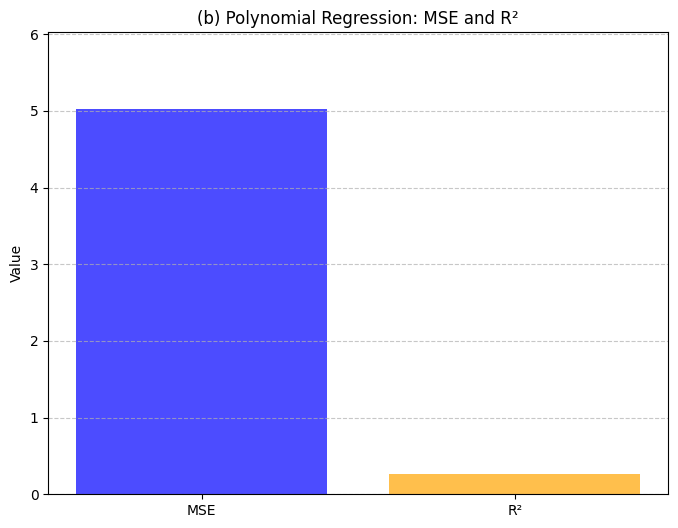

In [19]:
# Compute MSE and R²
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

# Plot MSE and R²
plt.figure(figsize=(8, 6))
plt.bar(['MSE', 'R²'], [mse_poly, r2_poly], color=['blue', 'orange'], alpha=0.7)
plt.title('(b) Polynomial Regression: MSE and R²')
plt.ylabel('Value')
plt.ylim([0, max(mse_poly, r2_poly) * 1.2])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Polynomial Regression (Degree 4):
Mean Squared Error: 4.656876721235405
R² Score: 0.32176062383033255


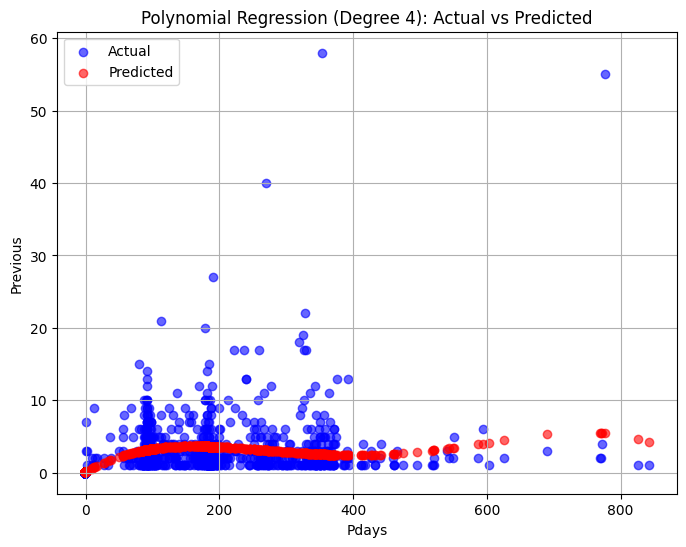

In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Extract the predictor (pdays) and response (previous)
X_pdays = Bank[['pdays']]
y_previous = Bank['previous']

# Add polynomial features (e.g., degree 2, 3, etc.)
poly = PolynomialFeatures(degree=4)  # You can change the degree here
X_pdays_poly = poly.fit_transform(X_pdays)

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pdays_poly, y_previous, test_size=0.3, random_state=42)

# Fit Polynomial Regression
poly_model = LinearRegression()
poly_model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred_poly = poly_model.predict(X_test)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

# Print results
print(f"Polynomial Regression (Degree 4):")
print(f"Mean Squared Error: {mse_poly}")
print(f"R² Score: {r2_poly}")

# Plot actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 1], y_test, color='blue', label='Actual', alpha=0.6)
plt.scatter(X_test[:, 1], y_pred_poly, color='red', label='Predicted', alpha=0.6)
plt.xlabel('Pdays')
plt.ylabel('Previous')
plt.title('Polynomial Regression (Degree 4): Actual vs Predicted')
plt.legend()
plt.grid()
plt.show()


Residuals for Polynomial Regression

/usr/local/lib/python3.10/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


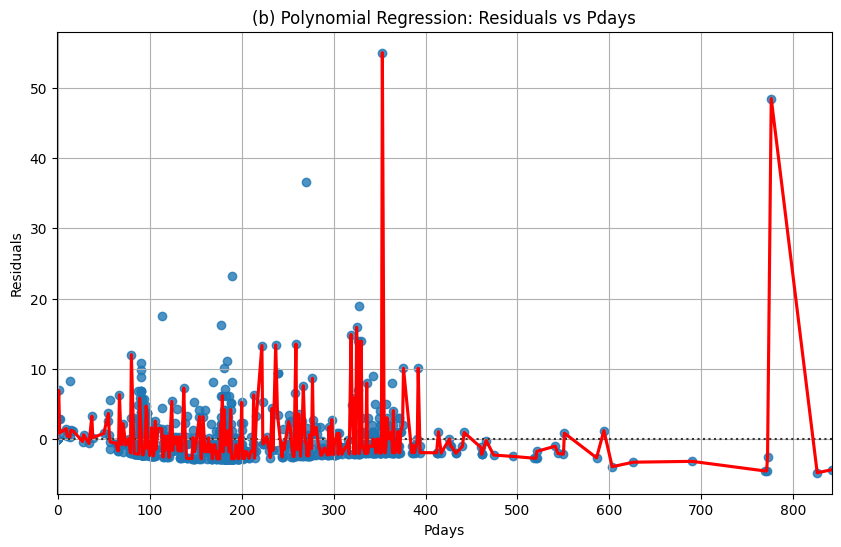

In [21]:
# Residuals for Polynomial Regression
residuals_poly = y_test - y_pred_poly

# Plot Residuals
plt.figure(figsize=(10, 6))
sns.residplot(x=X_test[:, 1], y=residuals_poly, lowess=True, line_kws={"color": "red"})

# Add labels and title
plt.xlabel('Pdays')
plt.ylabel('Residuals')
plt.title('(b) Polynomial Regression: Residuals vs Pdays')
plt.grid()
plt.show()


(c) Multi-Linear Regression

In [22]:
# Define the response variable and the predictors for multi-linear regression
y = Bank['previous']
X_multi = Bank[['pdays', 'balance', 'age']]  # Adding multiple predictors

# Split data for training and testing
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y, test_size=0.3, random_state=42)

# Fit the Multi-Linear Regression model
multi_model = LinearRegression()
multi_model.fit(X_train_multi, y_train_multi)

# Predict and evaluate
y_pred_multi = multi_model.predict(X_test_multi)
mse_multi = mean_squared_error(y_test_multi, y_pred_multi)
r2_multi = r2_score(y_test_multi, y_pred_multi)

# Print results
print("\n(c) Multi-Linear Regression:")
print(f"Mean Squared Error: {mse_multi}")
print(f"R² Score: {r2_multi}")



(c) Multi-Linear Regression:
Mean Squared Error: 5.199830687669385
R² Score: 0.2426834264882185


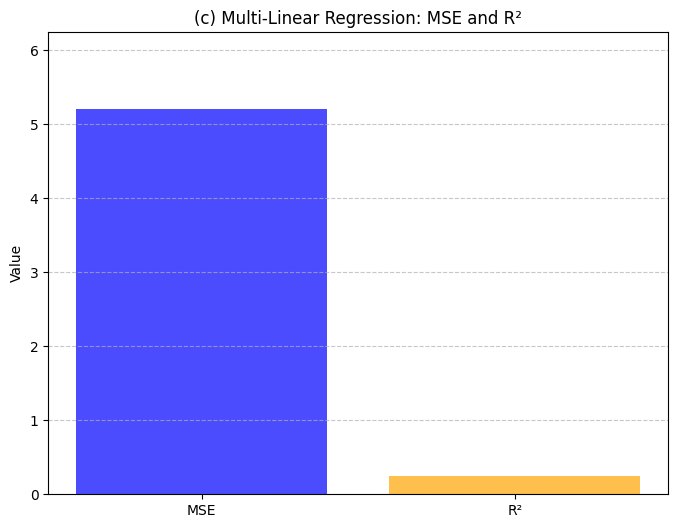

In [23]:
# Compute MSE and R²
mse_multi = mean_squared_error(y_test_multi, y_pred_multi)
r2_multi = r2_score(y_test_multi, y_pred_multi)

# Plot MSE and R²
plt.figure(figsize=(8, 6))
plt.bar(['MSE', 'R²'], [mse_multi, r2_multi], color=['blue', 'orange'], alpha=0.7)
plt.title('(c) Multi-Linear Regression: MSE and R²')
plt.ylabel('Value')
plt.ylim([0, max(mse_multi, r2_multi) * 1.2])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


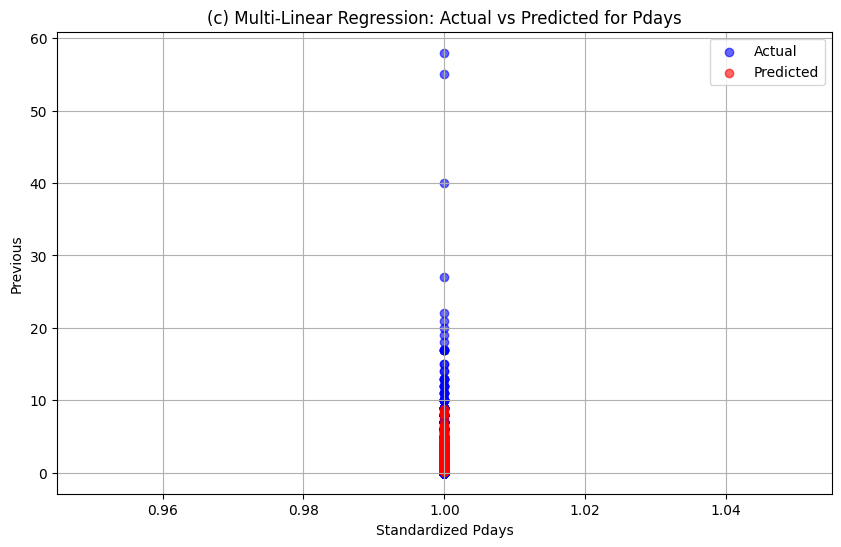

In [24]:
# Plot Actual vs Predicted for pdays (single predictor)
plt.figure(figsize=(10, 6))

# Scatter plot of actual values
plt.scatter(X_test[:, 0], y_test, color='blue', label='Actual', alpha=0.6)

# Scatter plot of predicted values
plt.scatter(X_test[:, 0], y_pred_multi, color='red', label='Predicted', alpha=0.6)

# Add labels and title
plt.xlabel('Standardized Pdays')
plt.ylabel('Previous')
plt.title('(c) Multi-Linear Regression: Actual vs Predicted for Pdays')
plt.legend()
plt.grid()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


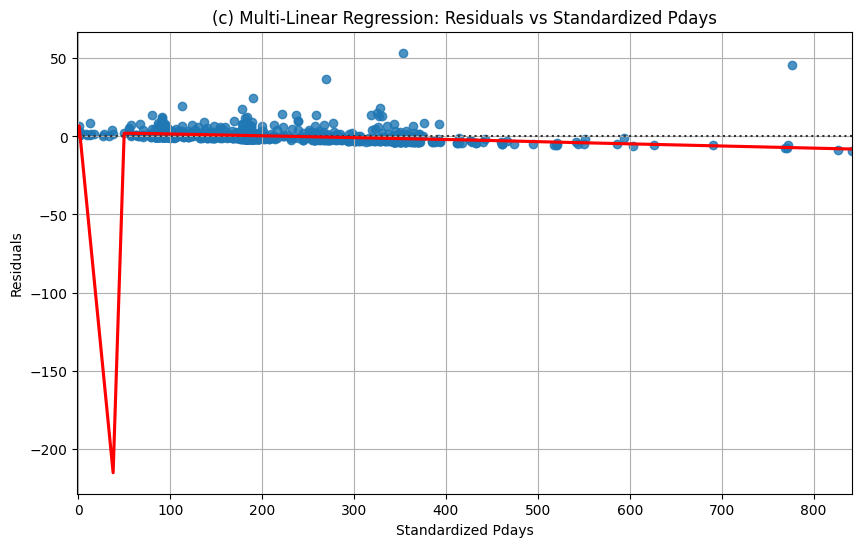

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test_multi - y_pred_multi

# Extract 'pdays' (first predictor) from X_test_multi
X_test_multi_np = X_test_multi.values if hasattr(X_test_multi, 'values') else X_test_multi
pdays_test = X_test_multi_np[:, 0]  # First column corresponds to 'pdays'

# Plot Residuals
plt.figure(figsize=(10, 6))
sns.residplot(x=pdays_test, y=residuals, lowess=True, line_kws={"color": "red"})

# Add labels and title
plt.xlabel('Standardized Pdays')
plt.ylabel('Residuals')
plt.title('(c) Multi-Linear Regression: Residuals vs Standardized Pdays')
plt.grid()
plt.show()


Part 2: Feature Selection / Model Optimization Methods

Complete the following objectives utilizing the data set you selected as ideal for:

Feature Selection / Model Optimization Methods

1. Perform a Forward Stepwise Selection and a Backward Stepwise Selection, for reference Chapter 6 lab, change the direction for backward selection.

2. Using the models generated for the feature selection, generate the plots of RSS and Adjusted R^2 for forward and backward features (as given in the exercise for chapter 6).

3. PCR

Perform a PCR on your selected data as detailed in Chapter 6 lab. Most of the datasets
should have sufficient features to make this task interesting. Generate a plot of the
components relative to their fit target.

1. Forward Stepwise Selection and Backward Stepwise Selection

Forward Stepwise Selection

In [26]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Define the response variable and predictors
y = Bank['previous']
X = Bank[['pdays', 'balance', 'age', 'duration', 'campaign']]  # Example predictors

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Forward Stepwise Selection
def forward_stepwise_selection(X, y):
    remaining_features = list(X.columns)
    selected_features = []
    results = []

    while remaining_features:
        best_score = float('inf')
        best_feature = None

        for feature in remaining_features:
            model = sm.OLS(y, sm.add_constant(X[selected_features + [feature]])).fit()
            RSS = ((model.predict(sm.add_constant(X[selected_features + [feature]])) - y) ** 2).sum()

            if RSS < best_score:
                best_score = RSS
                best_feature = feature

        if best_feature:
            selected_features.append(best_feature)
            remaining_features.remove(best_feature)
            results.append((selected_features[:], best_score))

    return results

# Run Forward Selection
forward_results = forward_stepwise_selection(X_train, y_train)

# Print Results
print("Forward Stepwise Selection Results:")
for i, (features, RSS) in enumerate(forward_results):
    print(f"Step {i+1}: Features: {features}, RSS: {RSS}")


Forward Stepwise Selection Results:
Step 1: Features: ['pdays'], RSS: 26158.541345482514
Step 2: Features: ['pdays', 'balance'], RSS: 26132.18930927319
Step 3: Features: ['pdays', 'balance', 'duration'], RSS: 26123.026514218433
Step 4: Features: ['pdays', 'balance', 'duration', 'age'], RSS: 26122.654730420785
Step 5: Features: ['pdays', 'balance', 'duration', 'age', 'campaign'], RSS: 26122.654126874506


Backward Stepwise Selection

In [27]:
def backward_stepwise_selection(X, y):
    selected_features = list(X.columns)
    results = []

    while len(selected_features) > 0:
        best_score = float('inf')
        worst_feature = None

        for feature in selected_features:
            temp_features = selected_features[:]
            temp_features.remove(feature)
            model = sm.OLS(y, sm.add_constant(X[temp_features])).fit()
            RSS = ((model.predict(sm.add_constant(X[temp_features])) - y) ** 2).sum()

            if RSS < best_score:
                best_score = RSS
                worst_feature = feature

        if worst_feature:
            selected_features.remove(worst_feature)
            results.append((selected_features[:], best_score))

    return results

# Run Backward Selection
backward_results = backward_stepwise_selection(X_train, y_train)

# Print Results
print("\nBackward Stepwise Selection Results:")
for i, (features, RSS) in enumerate(backward_results):
    print(f"Step {i+1}: Features: {features}, RSS: {RSS}")



Backward Stepwise Selection Results:
Step 1: Features: ['pdays', 'balance', 'age', 'duration'], RSS: 26122.65473042078
Step 2: Features: ['pdays', 'balance', 'duration'], RSS: 26123.026514218433
Step 3: Features: ['pdays', 'balance'], RSS: 26132.18930927319
Step 4: Features: ['pdays'], RSS: 26158.541345482514
Step 5: Features: [], RSS: 35613.48035325739


2. Plot RSS and Adjusted R² for Forward and Backward Selection

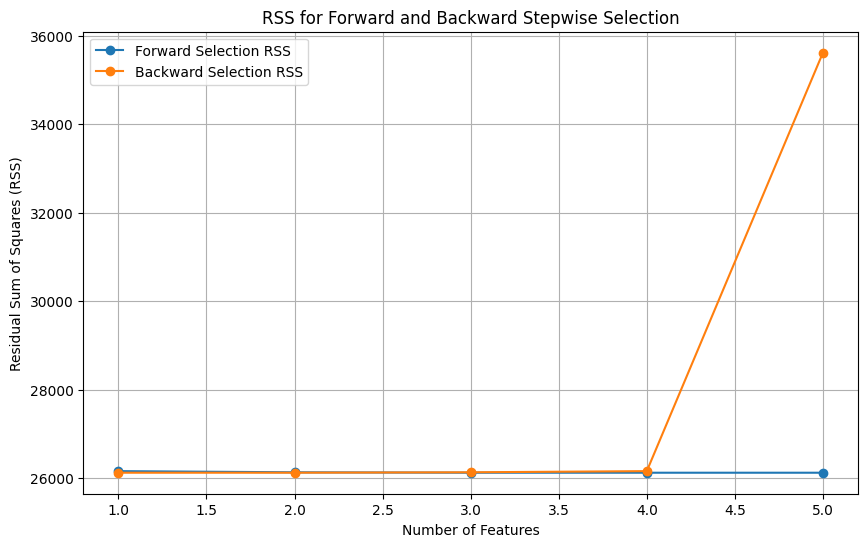

In [28]:
import matplotlib.pyplot as plt

# Extract RSS values
forward_RSS = [result[1] for result in forward_results]
backward_RSS = [result[1] for result in backward_results]

# Plot RSS for Forward and Backward Selection
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(forward_RSS)+1), forward_RSS, label="Forward Selection RSS", marker='o')
plt.plot(range(1, len(backward_RSS)+1), backward_RSS, label="Backward Selection RSS", marker='o')

plt.xlabel("Number of Features")
plt.ylabel("Residual Sum of Squares (RSS)")
plt.title("RSS for Forward and Backward Stepwise Selection")
plt.legend()
plt.grid()
plt.show()


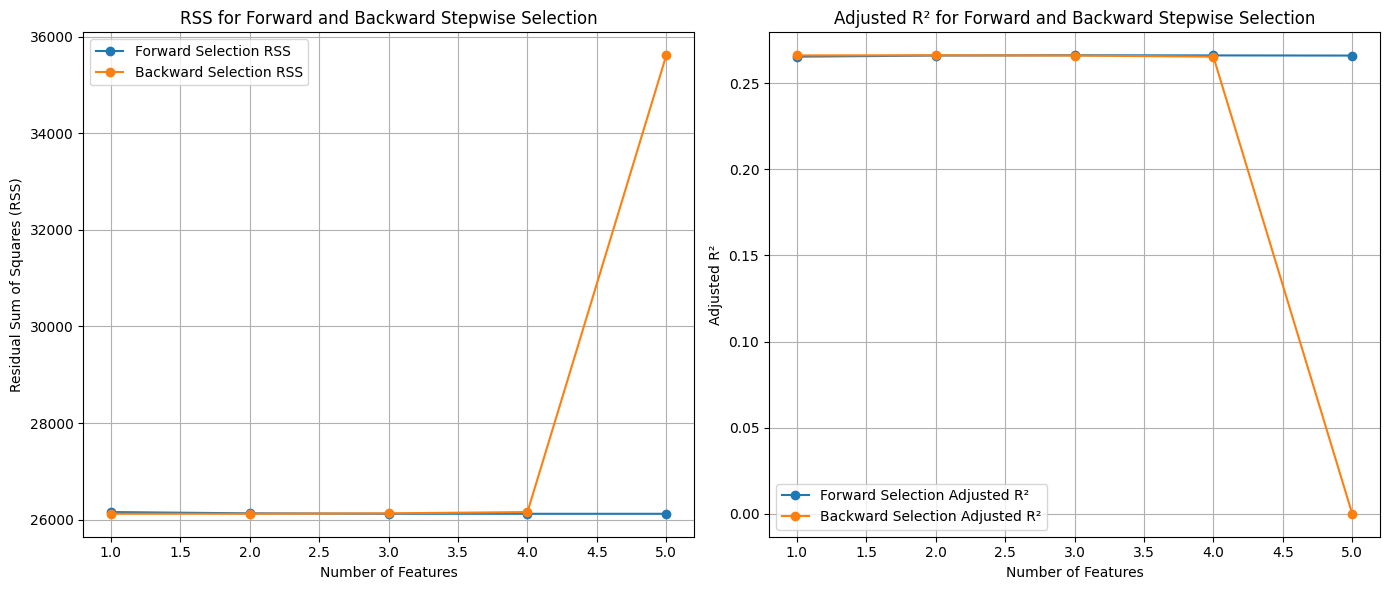

In [29]:
# Calculate Adjusted R²
def adjusted_r2(rss, tss, n, p):
    return 1 - (rss / (n - p - 1)) / (tss / (n - 1))

# Calculate RSS and Adjusted R² for Forward and Backward Selection
forward_RSS = [result[1] for result in forward_results]
backward_RSS = [result[1] for result in backward_results]
n = len(y_train)
tss = ((y_train - y_train.mean()) ** 2).sum()
forward_adj_r2 = [adjusted_r2(rss, tss, n, len(features)) for features, rss in forward_results]
backward_adj_r2 = [adjusted_r2(rss, tss, n, len(features)) for features, rss in backward_results]

# Plot RSS and Adjusted R²
plt.figure(figsize=(14, 6))

# RSS Plot
plt.subplot(1, 2, 1)
plt.plot(range(1, len(forward_RSS)+1), forward_RSS, label="Forward Selection RSS", marker='o')
plt.plot(range(1, len(backward_RSS)+1), backward_RSS, label="Backward Selection RSS", marker='o')
plt.xlabel("Number of Features")
plt.ylabel("Residual Sum of Squares (RSS)")
plt.title("RSS for Forward and Backward Stepwise Selection")
plt.legend()
plt.grid()

# Adjusted R² Plot
plt.subplot(1, 2, 2)
plt.plot(range(1, len(forward_adj_r2)+1), forward_adj_r2, label="Forward Selection Adjusted R²", marker='o')
plt.plot(range(1, len(backward_adj_r2)+1), backward_adj_r2, label="Backward Selection Adjusted R²", marker='o')
plt.xlabel("Number of Features")
plt.ylabel("Adjusted R²")
plt.title("Adjusted R² for Forward and Backward Stepwise Selection")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


3. Principal Component Regression (PCR)

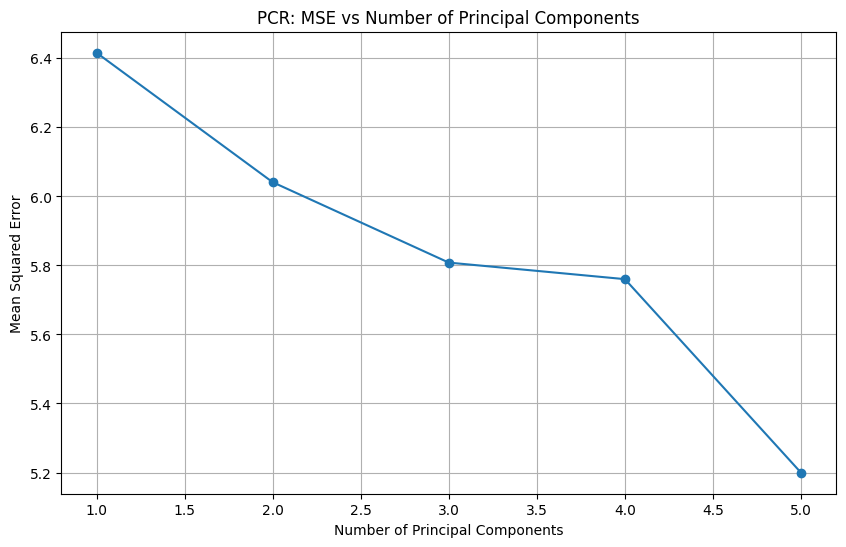

In [30]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Standardize the predictors
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# Perform Principal Component Analysis (PCA)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Train PCR model
mse = []
for i in range(1, X_pca.shape[1] + 1):
    X_pca_subset = X_pca[:, :i]
    model = LinearRegression()
    model.fit(X_pca_subset, y_train)
    y_pred = model.predict(pca.transform(scaler.transform(X_test))[:, :i])
    mse.append(mean_squared_error(y_test, y_pred))

# Plot MSE against the number of components
plt.figure(figsize=(10, 6))
plt.plot(range(1, X_pca.shape[1] + 1), mse, marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Mean Squared Error")
plt.title("PCR: MSE vs Number of Principal Components")
plt.grid()
plt.show()


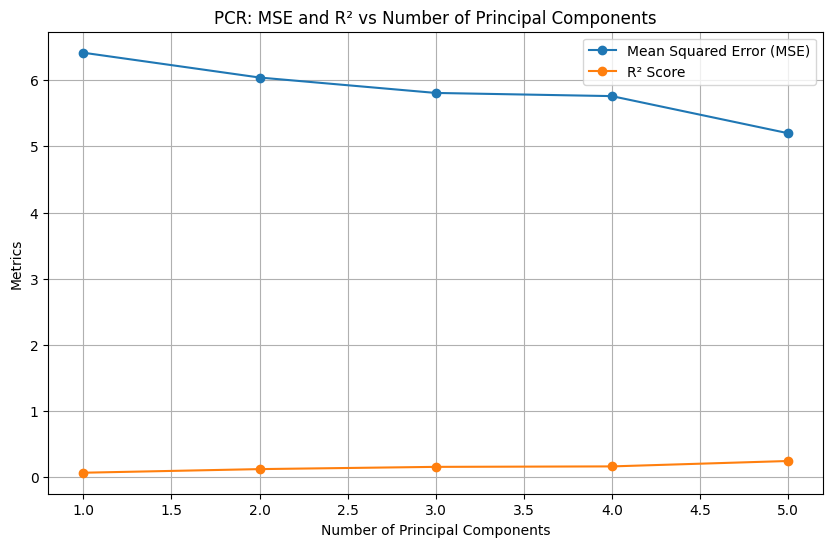

In [31]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Standardize predictors
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# PCR: Fit Linear Regression with increasing components
mse = []
r2 = []
for i in range(1, X_pca.shape[1] + 1):
    X_pca_subset = X_pca[:, :i]
    model = LinearRegression()
    model.fit(X_pca_subset, y_train)
    y_pred = model.predict(pca.transform(scaler.transform(X_test))[:, :i])
    mse.append(mean_squared_error(y_test, y_pred))
    r2.append(r2_score(y_test, y_pred))

# Plot PCR Results
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(mse)+1), mse, marker='o', label="Mean Squared Error (MSE)")
plt.plot(range(1, len(r2)+1), r2, marker='o', label="R² Score")
plt.xlabel("Number of Principal Components")
plt.ylabel("Metrics")
plt.title("PCR: MSE and R² vs Number of Principal Components")
plt.legend()
plt.grid()
plt.show()


Part 3: Classification

Complete the following objectives utilizing the data set you selected as ideal for:  **Classification**

Note: you should use the exercise from Chapter 4 and 5 as a reference
link here --> Chapter 4 (Classification)Links to an external site. & Chapter 5 (Sampling)Links to
an external site.

Generate two Classification Models for based on your given data.
These models will include Logistic Regression, Linear Discriminant Analysis, as given in the chapter 4 lab exercise.

Note: You'll need to make sure you properly encode any categorical data for your classes or
predictions.


Preparing the Dataset for Classification

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Define response variable (class) and predictors
# For demonstration, let's classify whether `previous > 0` (target is binary: 1 if `previous > 0`, else 0)
Bank['target'] = (Bank['previous'] > 0).astype(int)  # Create a binary classification target
X = Bank[['pdays', 'balance', 'age', 'duration', 'campaign']]  # Example predictors
y = Bank['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the predictors
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Fit Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_log_reg = log_reg.predict(X_test_scaled)

# Evaluate Logistic Regression
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg):.2f}")



Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2457
           1       1.00      0.99      0.99       892

    accuracy                           1.00      3349
   macro avg       1.00      0.99      1.00      3349
weighted avg       1.00      1.00      1.00      3349

Confusion Matrix:
[[2457    0]
 [  13  879]]
Accuracy: 1.00


Linear Discriminant Analysis (LDA)

In [34]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Fit Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_lda = lda.predict(X_test_scaled)

# Evaluate LDA
print("\nLinear Discriminant Analysis Classification Report:")
print(classification_report(y_test, y_pred_lda))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lda))
print(f"Accuracy: {accuracy_score(y_test, y_pred_lda):.2f}")



Linear Discriminant Analysis Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      2457
           1       1.00      0.71      0.83       892

    accuracy                           0.92      3349
   macro avg       0.95      0.86      0.89      3349
weighted avg       0.93      0.92      0.92      3349

Confusion Matrix:
[[2457    0]
 [ 255  637]]
Accuracy: 0.92


Comparison between Logistic Regression and LDA

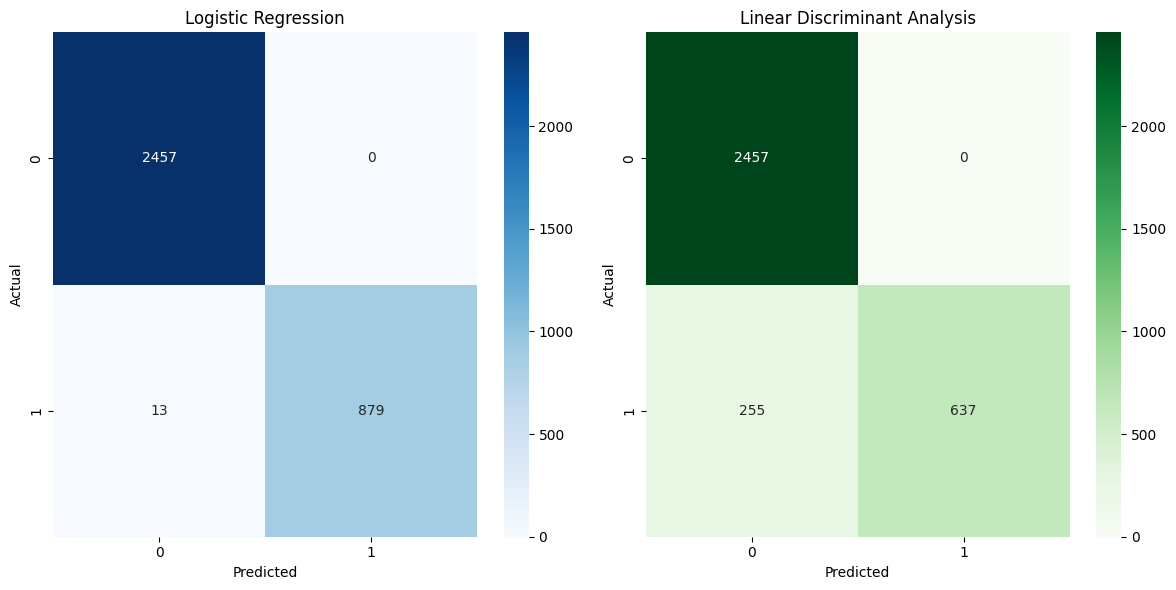

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion matrices for Logistic Regression and LDA
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Logistic Regression Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_log_reg), annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title("Logistic Regression")
ax[0].set_xlabel("Predicted")
ax[0].set_ylabel("Actual")

# LDA Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_lda), annot=True, fmt='d', cmap='Greens', ax=ax[1])
ax[1].set_title("Linear Discriminant Analysis")
ax[1].set_xlabel("Predicted")
ax[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()


Section B:

Part 1: Splines

Complete the following objectives utilizing the data set you selected as ideal for: **Natural and Cubic Splines **

Note: you may use the exercise from Chapter 7 as a reference link here --> Chapter 7 (Splines)

• Polynomial Regression and Step Functions:

o Try out different degrees and deliver the changes observed through
discussion/comments.

• Splines

of Basis-Spline and Natural-Spline (as given in the lab) and two new
fits of df 9 and 22. (substitute the values as given in the assignment)
What would you conclude from the results generated from the fits given
by df 16,22 compared to the default in the lab for both the B-spline and
N-spline?

Load Dataset and Prepare

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from patsy import dmatrix

# Load the dataset
# Assuming `bank_data` is already loaded and contains numeric predictors
# Let's use `pdays` as the predictor and `previous` as the response variable

X = Bank['pdays']
y = Bank['previous']

# Sort data for consistent visualization
sorted_indices = np.argsort(X)
X_sorted = X.iloc[sorted_indices]
y_sorted = y.iloc[sorted_indices]


Polynomial Regression and Step Functions

Polynomial Regression

Degree 1: MSE = 3.901145696757281


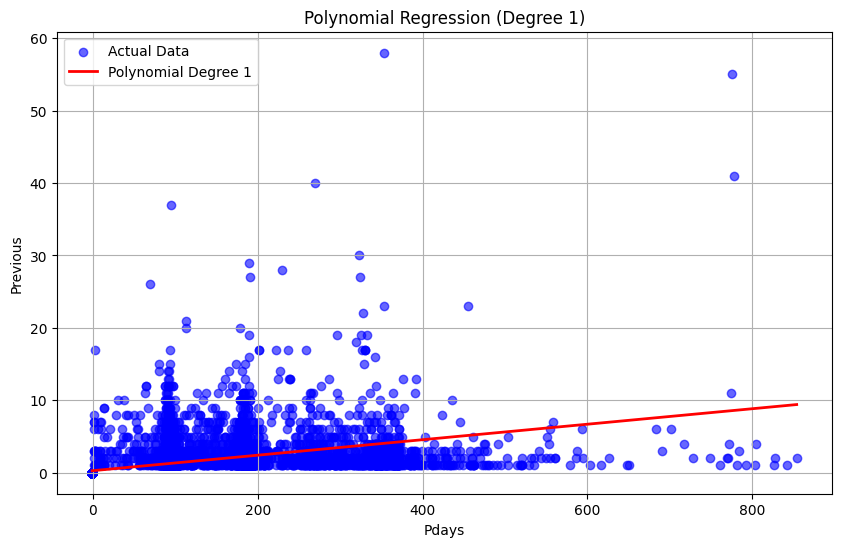

Degree 2: MSE = 3.6283340594282376


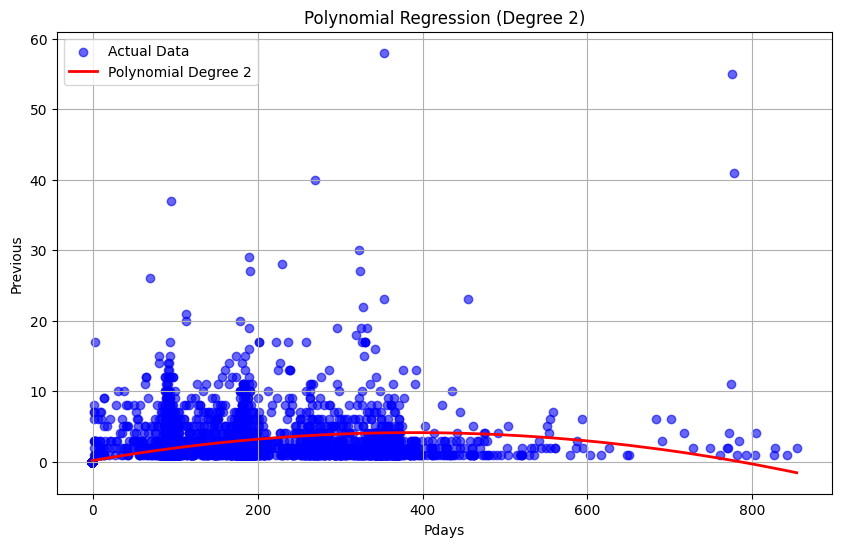

Degree 4: MSE = 3.2673537573823275


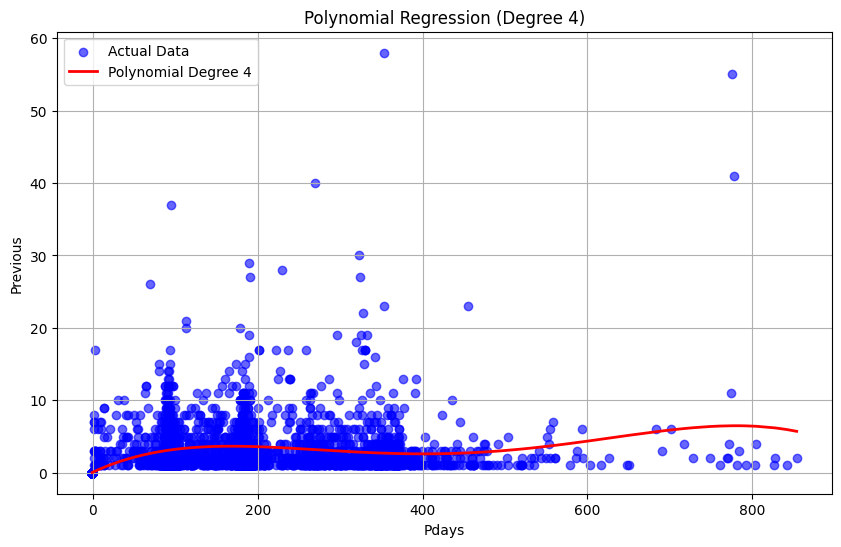

In [37]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Try polynomial degrees 1, 2, and 4
degrees = [1, 2, 4]
for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X_sorted.values.reshape(-1, 1))

    # Fit polynomial regression
    model = LinearRegression()
    model.fit(X_poly, y_sorted)
    y_pred = model.predict(X_poly)

    # Evaluate and plot
    mse = mean_squared_error(y_sorted, y_pred)
    print(f"Degree {degree}: MSE = {mse}")

    plt.figure(figsize=(10, 6))
    plt.scatter(X_sorted, y_sorted, color='blue', alpha=0.6, label='Actual Data')
    plt.plot(X_sorted, y_pred, color='red', linewidth=2, label=f'Polynomial Degree {degree}')
    plt.xlabel('Pdays')
    plt.ylabel('Previous')
    plt.title(f'Polynomial Regression (Degree {degree})')
    plt.legend()
    plt.grid()
    plt.show()


Step Functions

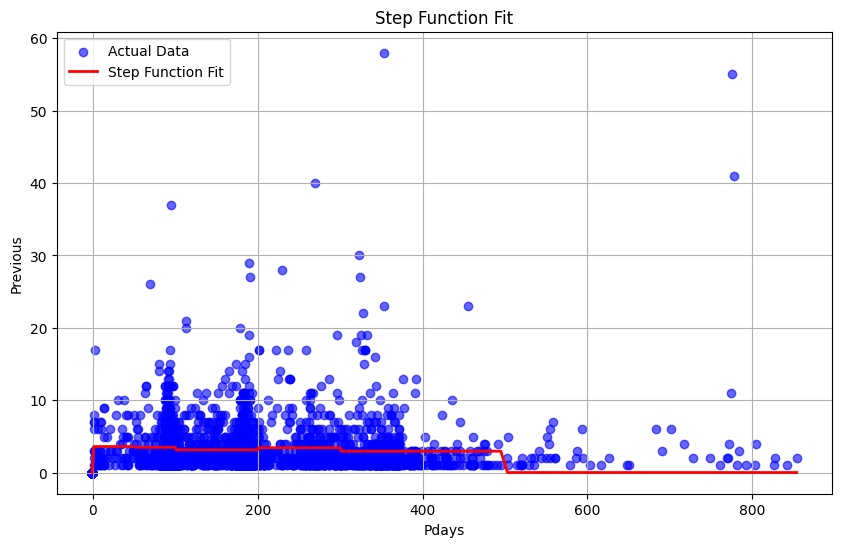

In [38]:
# Divide `pdays` into step bins
step_bins = pd.cut(X_sorted, bins=[-1, 50, 100, 200, 300, 500], labels=False)

# Fit a linear model on step bins
step_dummies = pd.get_dummies(step_bins)
step_model = LinearRegression()
step_model.fit(step_dummies, y_sorted)
y_step_pred = step_model.predict(step_dummies)

# Plot step function fit
plt.figure(figsize=(10, 6))
plt.scatter(X_sorted, y_sorted, color='blue', alpha=0.6, label='Actual Data')
plt.plot(X_sorted, y_step_pred, color='red', linewidth=2, label='Step Function Fit')
plt.xlabel('Pdays')
plt.ylabel('Previous')
plt.title('Step Function Fit')
plt.legend()
plt.grid()
plt.show()


Splines (B-Spline and Natural Spline)

Basis-Spline (B-Spline)

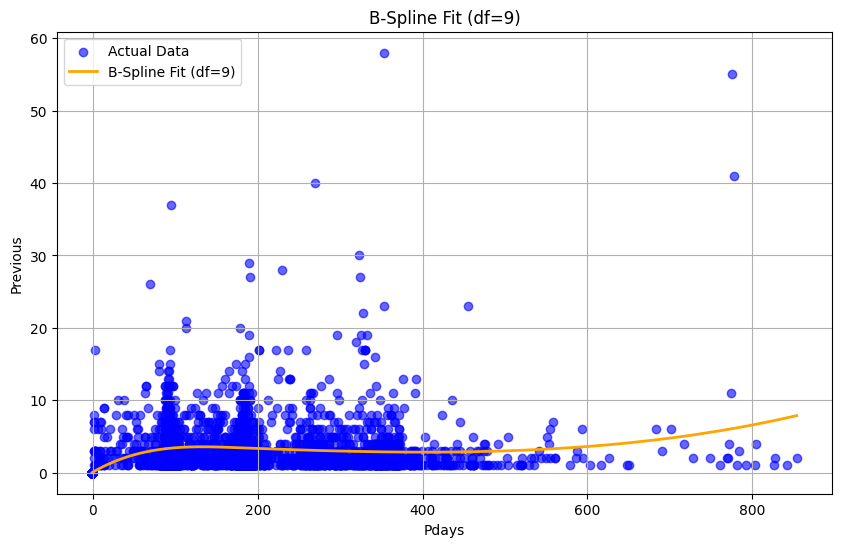

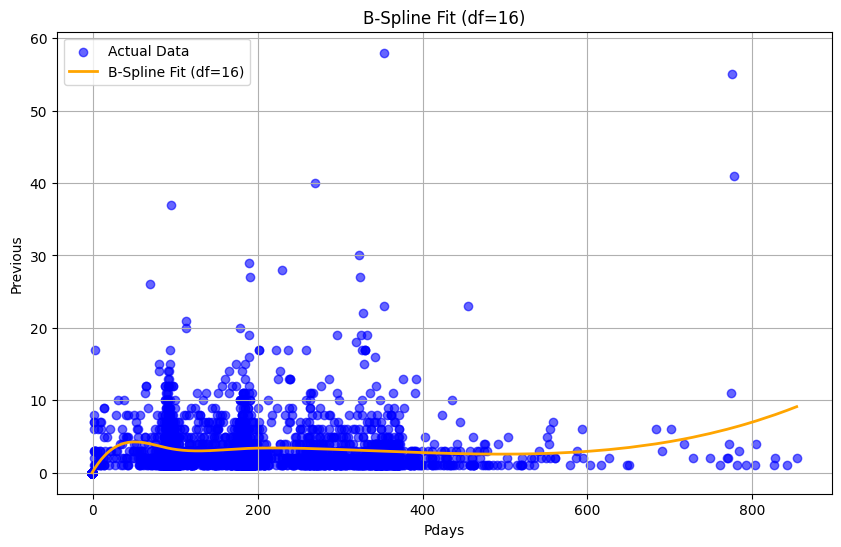

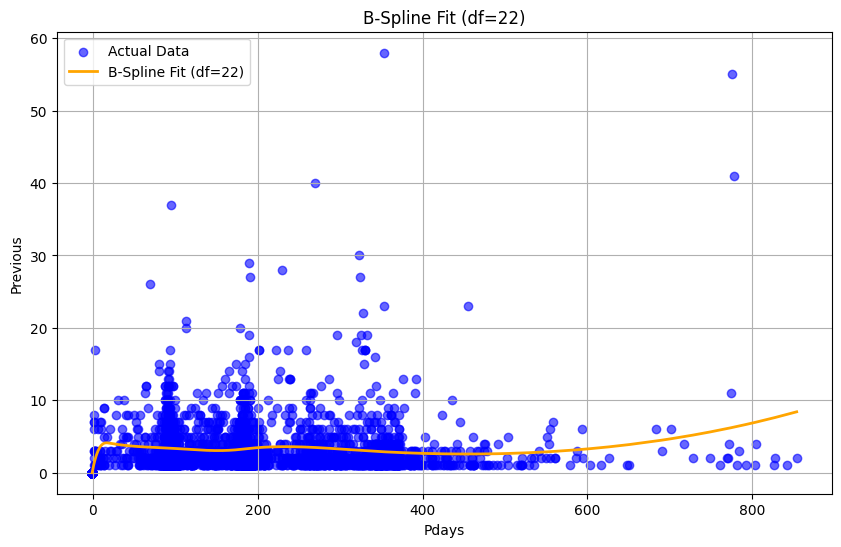

In [39]:
from patsy import dmatrix
import statsmodels.api as sm

# Fit B-splines with df=9, 16, 22
dfs = [9, 16, 22]
for df in dfs:
    # Create B-spline basis with specified df
    X_bspline = dmatrix(f"bs(X_sorted, df={df}, include_intercept=False)", {"X_sorted": X_sorted}, return_type='dataframe')

    # Fit model
    bspline_model = sm.OLS(y_sorted, X_bspline).fit()
    y_bspline_pred = bspline_model.predict(X_bspline)

    # Plot B-spline fit
    plt.figure(figsize=(10, 6))
    plt.scatter(X_sorted, y_sorted, color='blue', alpha=0.6, label='Actual Data')
    plt.plot(X_sorted, y_bspline_pred, color='orange', linewidth=2, label=f'B-Spline Fit (df={df})')
    plt.xlabel('Pdays')
    plt.ylabel('Previous')
    plt.title(f'B-Spline Fit (df={df})')
    plt.legend()
    plt.grid()
    plt.show()


Natural Spline (N-Spline)

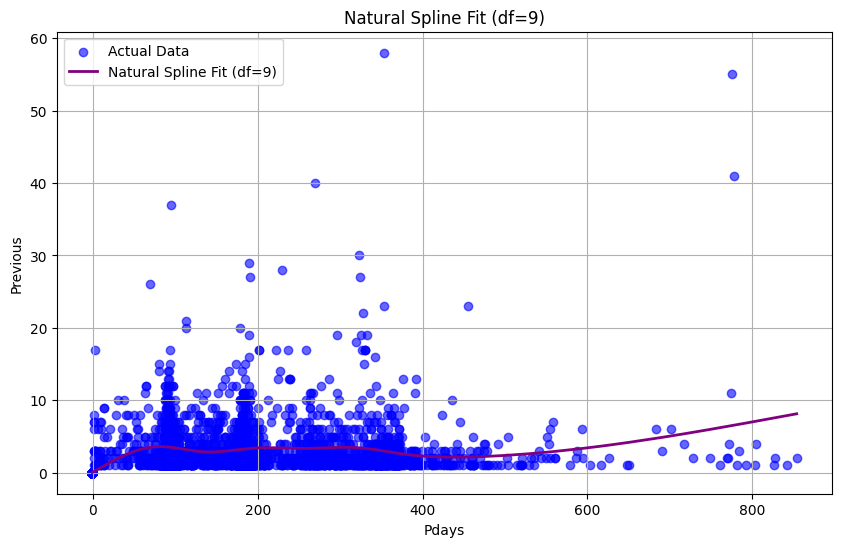

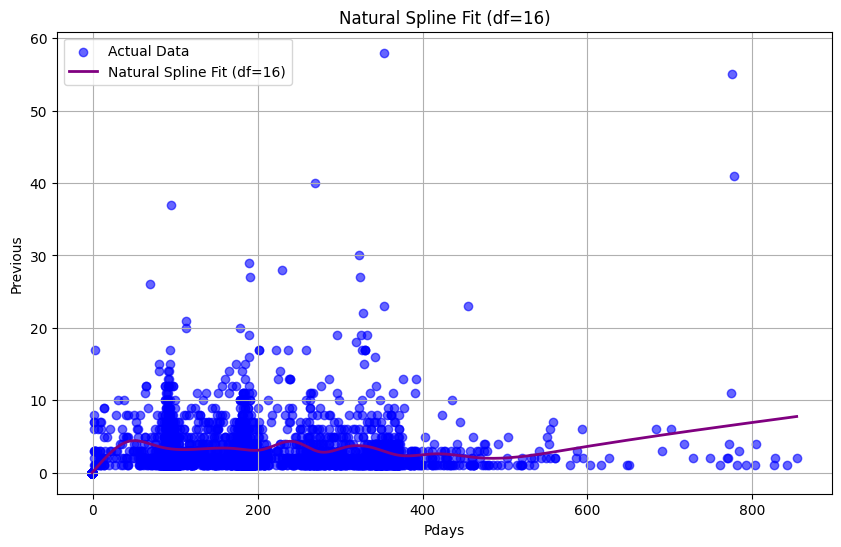

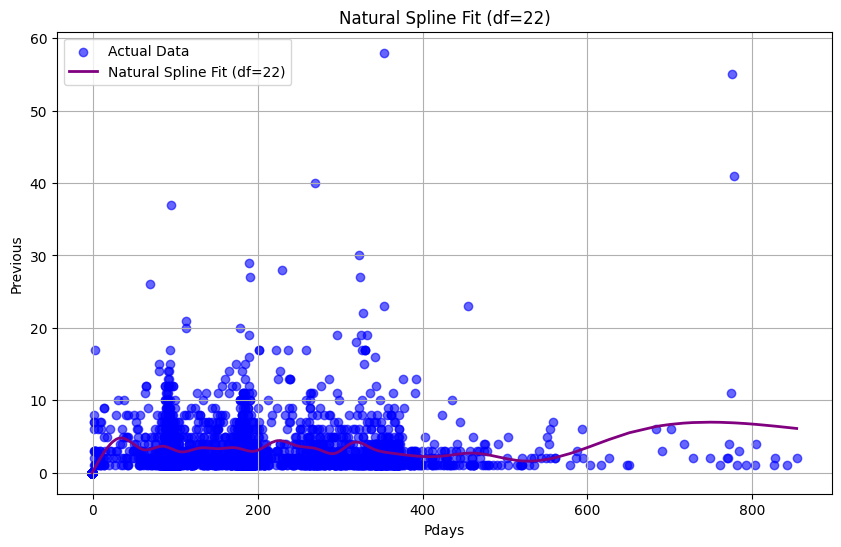

In [40]:
# Fit Natural splines with df=9, 16, 22
for df in dfs:
    # Create Natural spline basis with specified df
    X_nspline = dmatrix(f"cr(X_sorted, df={df})", {"X_sorted": X_sorted}, return_type='dataframe')

    # Fit model
    nspline_model = sm.OLS(y_sorted, X_nspline).fit()
    y_nspline_pred = nspline_model.predict(X_nspline)

    # Plot Natural spline fit
    plt.figure(figsize=(10, 6))
    plt.scatter(X_sorted, y_sorted, color='blue', alpha=0.6, label='Actual Data')
    plt.plot(X_sorted, y_nspline_pred, color='purple', linewidth=2, label=f'Natural Spline Fit (df={df})')
    plt.xlabel('Pdays')
    plt.ylabel('Previous')
    plt.title(f'Natural Spline Fit (df={df})')
    plt.legend()
    plt.grid()
    plt.show()


Part 2: Tress and SVM

Complete the following objectives utilizing the data set you selected as ideal for: **Trees and SVM**
Note: you may use the exercise from Chapter 8 and 9 as a reference link here -->
Chapter 8 Lab , Chapter 8_R_Lab / Chapter_9_Lab , Chapter_9 R Lab

• Trees

o Generate a Tree Classifier or Regressor for the classes and predictors of the chosen dataset.

o Perform Regression/Classification Tree, Random Forest, and
Regression/Classification Boosting based on the dataset chosen.

• Support Vector Machines

o Perform SVC and SVM for the multiclass classification with outputs
resulting in decision boundary plots and confusion matrices.


Trees and SVM

Data Preparation

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define response variable and predictors
# For demonstration, classify whether `previous > 0` (binary classification)
Bank['target'] = (Bank['previous'] > 0).astype(int)
X = Bank[['pdays', 'balance', 'age', 'duration', 'campaign']]  # Predictors
y = Bank['target']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize predictors for SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Tree Models

(a) Classification and Regression Trees


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2457
           1       1.00      1.00      1.00       892

    accuracy                           1.00      3349
   macro avg       1.00      1.00      1.00      3349
weighted avg       1.00      1.00      1.00      3349

Confusion Matrix:
[[2457    0]
 [   0  892]]
Unique Classes in y_train: [0 1]
Unique Classes in y_test: [0 1]


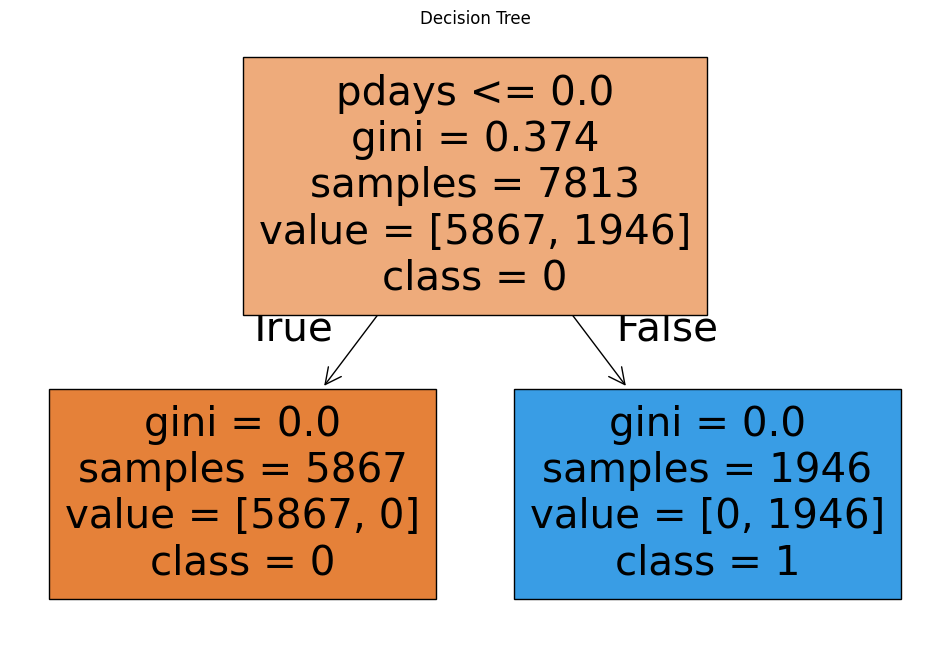

In [42]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix

# Train a Decision Tree Classifier
tree_clf = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_clf.fit(X_train, y_train)

# Evaluate the Decision Tree
y_pred_tree = tree_clf.predict(X_test)
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_tree))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_tree))
# Verify the unique classes in the target variable
print("Unique Classes in y_train:", y_train.unique())
print("Unique Classes in y_test:", y_test.unique())

# Update the class names dynamically
class_names = [str(cls) for cls in y_train.unique()]  # Dynamically set class names

# Plot the Decision Tree with correct class names
plt.figure(figsize=(12, 8))
plot_tree(tree_clf, feature_names=X.columns, class_names=class_names, filled=True)
plt.title("Decision Tree")
plt.show()


(b) Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Evaluate the Random Forest
y_pred_rf = rf_clf.predict(X_test)
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))



Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2457
           1       1.00      1.00      1.00       892

    accuracy                           1.00      3349
   macro avg       1.00      1.00      1.00      3349
weighted avg       1.00      1.00      1.00      3349

Confusion Matrix:
[[2457    0]
 [   0  892]]


(c) Boosting (Gradient Boosting)

In [44]:
from sklearn.ensemble import GradientBoostingClassifier

# Train a Gradient Boosting Classifier
boost_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
boost_clf.fit(X_train, y_train)

# Evaluate the Boosting Model
y_pred_boost = boost_clf.predict(X_test)
print("\nGradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_boost))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_boost))



Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2457
           1       1.00      1.00      1.00       892

    accuracy                           1.00      3349
   macro avg       1.00      1.00      1.00      3349
weighted avg       1.00      1.00      1.00      3349

Confusion Matrix:
[[2457    0]
 [   0  892]]


Support Vector Machines (SVM)

(a) Support Vector Classification (SVC) for Binary Classification


SVC Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2457
           1       1.00      0.99      0.99       892

    accuracy                           1.00      3349
   macro avg       1.00      0.99      1.00      3349
weighted avg       1.00      1.00      1.00      3349

Confusion Matrix:
[[2457    0]
 [  10  882]]


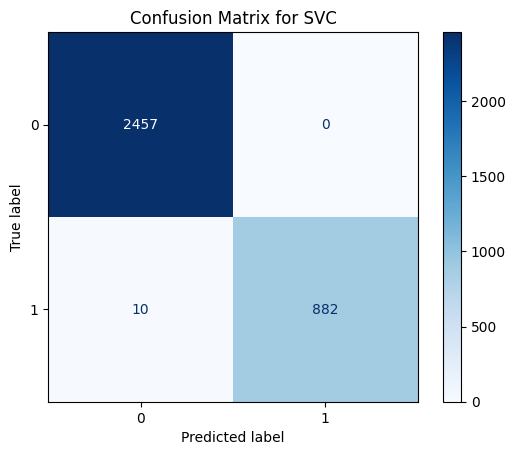

In [45]:
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix

# Train SVC
svc_clf = SVC(kernel='linear', random_state=42)
svc_clf.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_svc = svc_clf.predict(X_test_scaled)

# Evaluate SVC
print("\nSVC Classification Report:")
print(classification_report(y_test, y_pred_svc))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svc))

# Display the confusion matrix
disp = ConfusionMatrixDisplay.from_estimator(svc_clf, X_test_scaled, y_test, cmap="Blues")
disp.ax_.set_title("Confusion Matrix for SVC")
plt.show()



SVC Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2457
           1       1.00      0.99      0.99       892

    accuracy                           1.00      3349
   macro avg       1.00      0.99      1.00      3349
weighted avg       1.00      1.00      1.00      3349

Confusion Matrix:
[[2457    0]
 [  10  882]]


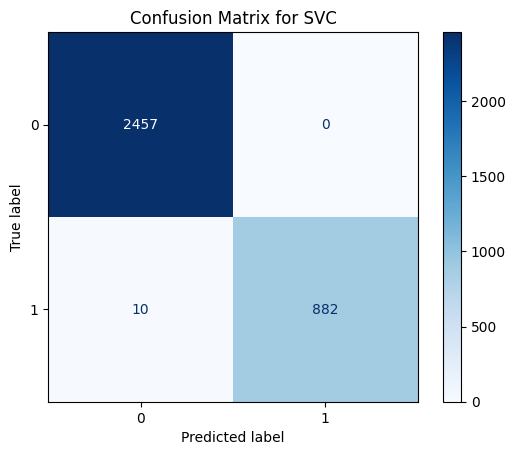

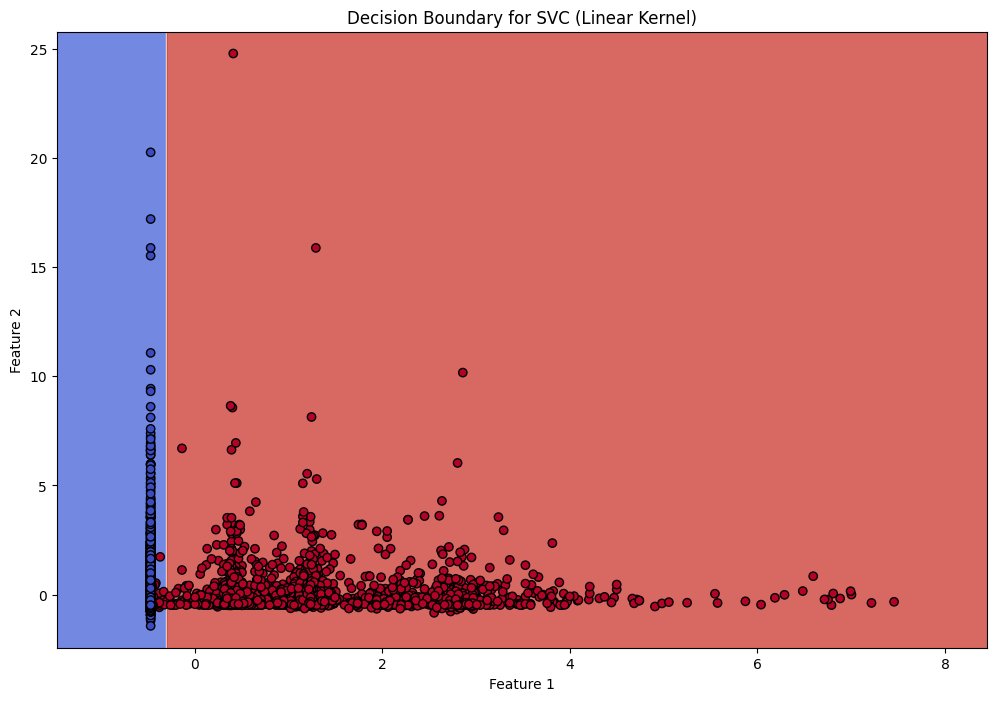

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix

# Train SVC
svc_clf = SVC(kernel='linear', random_state=42)
svc_clf.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_svc = svc_clf.predict(X_test_scaled)

# Evaluate SVC
print("\nSVC Classification Report:")
print(classification_report(y_test, y_pred_svc))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svc))

# Display Confusion Matrix
disp = ConfusionMatrixDisplay.from_estimator(svc_clf, X_test_scaled, y_test, cmap="Blues")
disp.ax_.set_title("Confusion Matrix for SVC")
plt.show()

# Decision Boundary Plot (works only with two predictors)
def plot_decision_boundary(clf, X, y, title):
    # Reduce to two features for visualization
    h = 0.02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict for the grid points
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.figure(figsize=(12, 8))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k", cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Use only two predictors for decision boundary visualization
X_train_2d = X_train_scaled[:, :2]  # Use the first two predictors
svc_clf_2d = SVC(kernel="linear", random_state=42)
svc_clf_2d.fit(X_train_2d, y_train)

# Plot decision boundary
plot_decision_boundary(svc_clf_2d, X_train_2d, y_train, "Decision Boundary for SVC (Linear Kernel)")


(b) SVM with Non-linear Kernel


SVM (RBF Kernel) Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2457
           1       1.00      0.98      0.99       892

    accuracy                           1.00      3349
   macro avg       1.00      0.99      0.99      3349
weighted avg       1.00      1.00      1.00      3349

Confusion Matrix:
[[2457    0]
 [  14  878]]


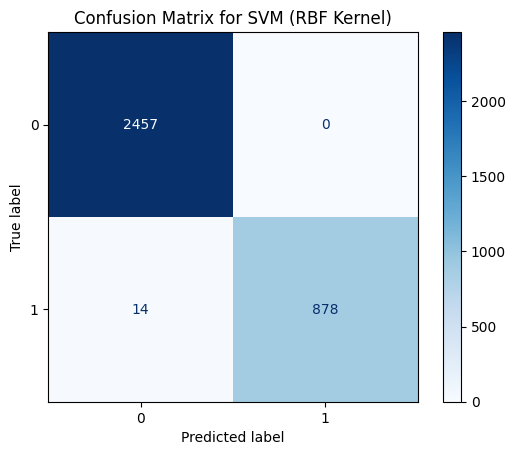

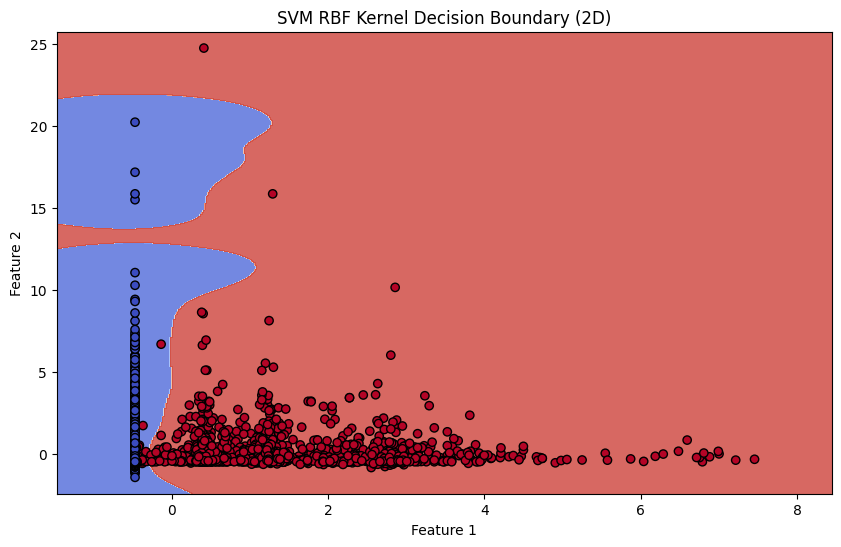

In [49]:
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix

# Train SVM with RBF Kernel on all features
svm_rbf = SVC(kernel='rbf', gamma=0.5, C=1, random_state=42)
svm_rbf.fit(X_train_scaled, y_train)

# Predict and Evaluate
y_pred_svm_rbf = svm_rbf.predict(X_test_scaled)
print("\nSVM (RBF Kernel) Classification Report:")
print(classification_report(y_test, y_pred_svm_rbf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm_rbf))

# Display Confusion Matrix
disp = ConfusionMatrixDisplay.from_estimator(svm_rbf, X_test_scaled, y_test, cmap="Blues")
disp.ax_.set_title("Confusion Matrix for SVM (RBF Kernel)")
plt.show()

# Decision Boundary Plot (only works with 2 predictors)
def plot_decision_boundary(clf, X, y, title):
    h = 0.02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict for the grid points
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k", cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Use only two predictors for decision boundary visualization
X_train_2d = X_train_scaled[:, :2]  # Use the first two predictors
svm_rbf_2d = SVC(kernel='rbf', gamma=0.5, C=1, random_state=42)
svm_rbf_2d.fit(X_train_2d, y_train)

# Plot decision boundary
plot_decision_boundary(svm_rbf_2d, X_train_2d, y_train, "SVM RBF Kernel Decision Boundary (2D)")
